In [30]:
!pip install pandas matplotlib seaborn wordcloud nltk scikit-learn


In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score


In [116]:
df = pd.read_csv('./finalmerge.csv')
df.head()

,hotel_id,user_name,review_text,date,title,Location
0,110286,919254556611,none,28 May 2023,5,Agra
1,110286,Rajg,none,30 Apr 2023,5,Agra
2,110286,Sagar Kumar,Wonderful stay.,24 Apr 2023,5,Agra
3,110286,Sumit Sharma,Excellent,20 Apr 2023,5,Agra
4,110286,rajesh kumardomadia,All good facilities available and good support,13 Apr 2023,5,Agra


In [89]:
df.shape

(204533, 6)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204533 entries, 0 to 204532
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   hotel_id     204533 non-null  int64 
 1   user_name    204533 non-null  object
 2   review_text  204533 non-null  object
 3   date         204533 non-null  object
 4   title        204533 non-null  int64 
 5   Location     204533 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.4+ MB


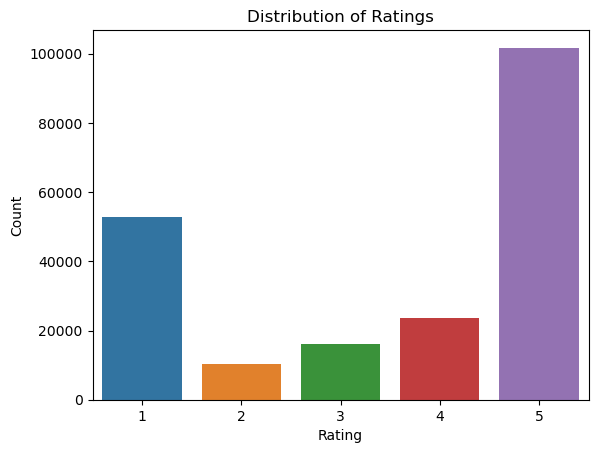

In [91]:
sns.countplot(x='title', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [92]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

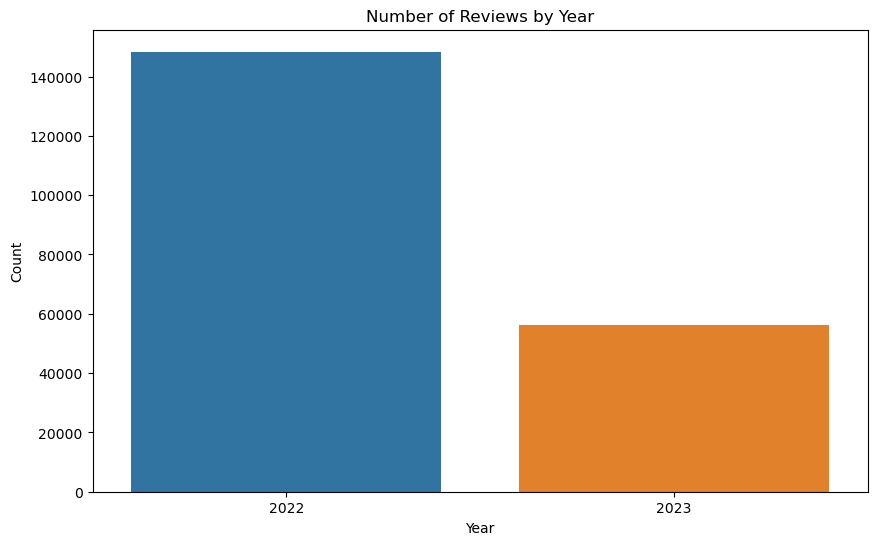

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

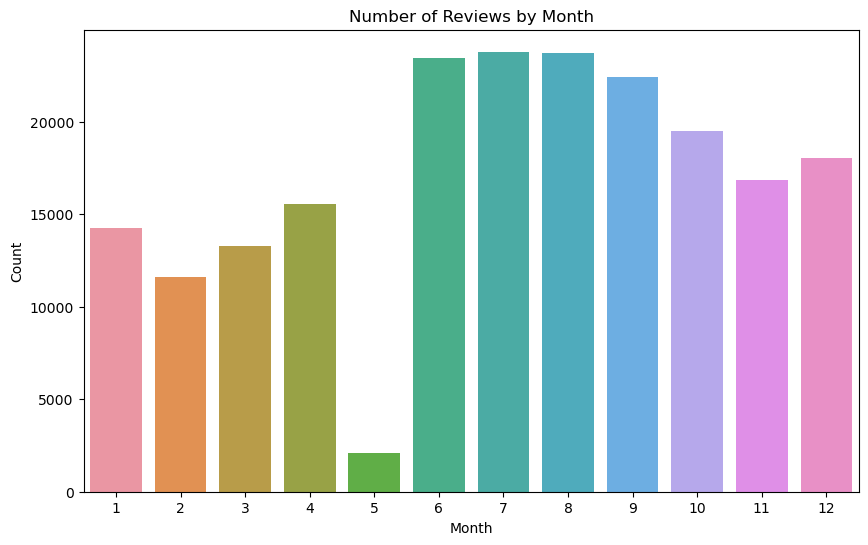

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Number of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

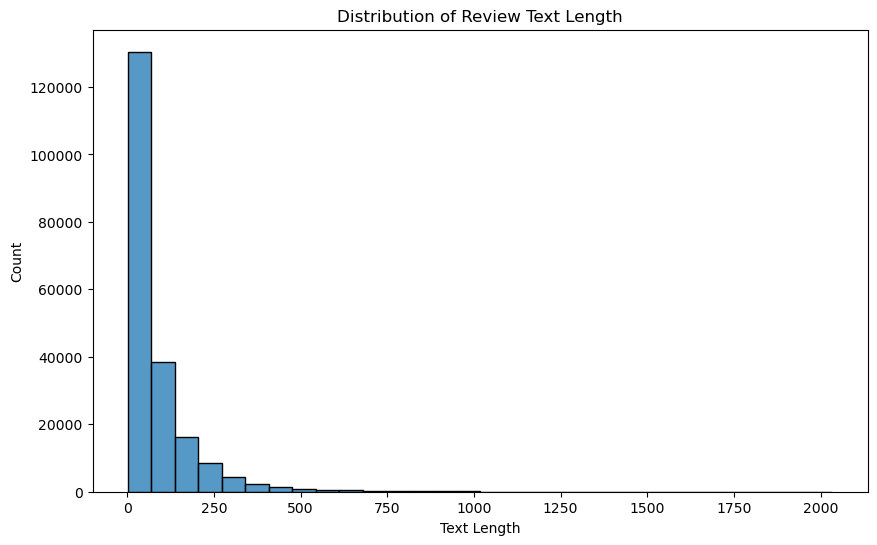

In [95]:
df['review_text_length'] = df['review_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_text_length'], bins=30)
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [117]:
df = df[df['title'] != 3]


In [118]:
df['sentiment'] = df['title'].apply(lambda x: 'Positive' if x > 3 else 'Negative' )


In [119]:
df.sample(60)

,hotel_id,user_name,review_text,date,title,Location,sentiment
102463,104618,Kuldeep Yadav,So most beautiful rooms,02 Aug 2022,5,Jaipur,Positive
192685,160941,DharmendraPatidar,Very nice ☺️ like hotel,20 Sep 2022,5,Udaipur,Positive
6147,193588,Jeya Bharathi,It's good for people to know the exact price f...,18 Oct 2022,5,Alappuzha,Positive
85138,109864,Gulam Gaus,Pathetic service,02 Oct 2022,1,Gurgaon,Negative
39566,59129,Simarjit Singh,On line payment mt karo,14 Mar 2023,5,Bathinda,Positive
144599,112910,Rana Ji,osm,08 Jul 2022,5,Lucknow,Positive
157539,113064,Mahesh Goapalakrishnan,Overall good.,15 Jun 2022,5,Mumbai,Positive
59926,173917,Sandipan,Very disappointing.,21 Aug 2022,1,Chennai,Negative
145632,170040,Gaurav Singh,Location was decent and the room was nice but ...,21 Sep 2022,4,Lucknow,Positive
13277,106208,Omkar Tribhuwan,"Great location, really pleasant and clean room...",09 Aug 2022,5,Bangalore,Positive


In [99]:
df.shape

(188338, 10)

In [120]:
final_data=df.copy()

In [121]:
final_data

,hotel_id,user_name,review_text,date,title,Location,sentiment
0,110286,919254556611,none,28 May 2023,5,Agra,Positive
1,110286,Rajg,none,30 Apr 2023,5,Agra,Positive
2,110286,Sagar Kumar,Wonderful stay.,24 Apr 2023,5,Agra,Positive
3,110286,Sumit Sharma,Excellent,20 Apr 2023,5,Agra,Positive
4,110286,rajesh kumardomadia,All good facilities available and good support,13 Apr 2023,5,Agra,Positive
...,...,...,...,...,...,...,...
204528,89724,SANJAY CHAUHAN,Room service was not gud. There was no one to ...,20 Dec 2022,1,Zirakpur,Negative
204529,89724,LokeshKashyap,I reached at 2 am there was ji bell boy i had ...,18 Dec 2022,1,Zirakpur,Negative
204530,89724,Dhruv Goel,if you are looking to stay in a 4-5 star prope...,18 Nov 2022,1,Zirakpur,Negative
204531,89724,Shivam Bajaj,Check-in experience was soo bad. Room is good ...,19 Jul 2022,1,Zirakpur,Negative


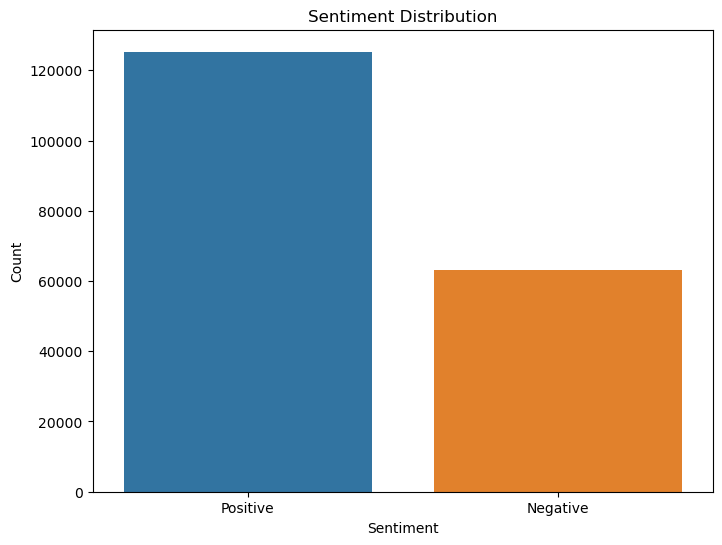

In [122]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=sentiment_counts.index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [123]:
# Convert text to lowercase
df['review_text'] = df['review_text'].str.lower()

# Remove punctuation
df['review_text'] = df['review_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove numbers
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove extra whitespace
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [124]:
from nltk.corpus import stopwords


stopwords = set(stopwords.words('english'))
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))


lemmatizer = WordNetLemmatizer()
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))



In [125]:
positive = df[df['sentiment'] == 'Positive']
negative = df[df['sentiment'] == 'Negative']


good         78988
room         31956
hotel        28546
nice         28007
staff        24686
stay         18091
service      17740
clean        13238
location      9005
excellent     8601
dtype: int64


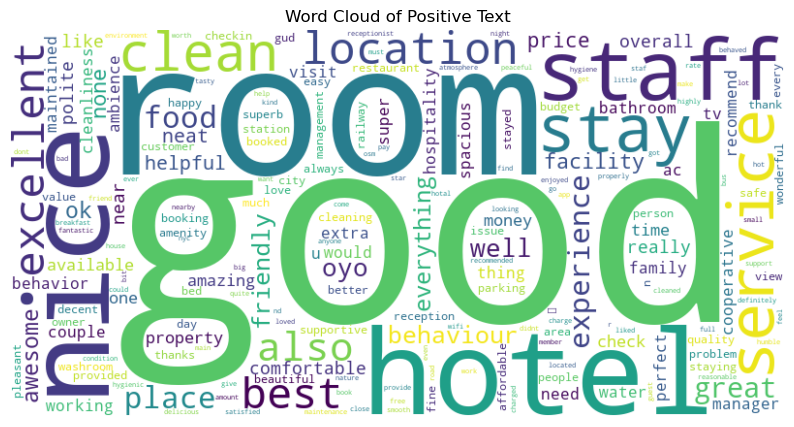

In [126]:
word_freq = positive['review_text'].str.split(expand=True).stack().value_counts()
print(word_freq.head(10))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Text')
plt.show()

room       39821
hotel      27724
oyo        19396
extra      17390
bad        14373
money      11262
service     9580
worst       9507
staff       9316
booking     9212
dtype: int64


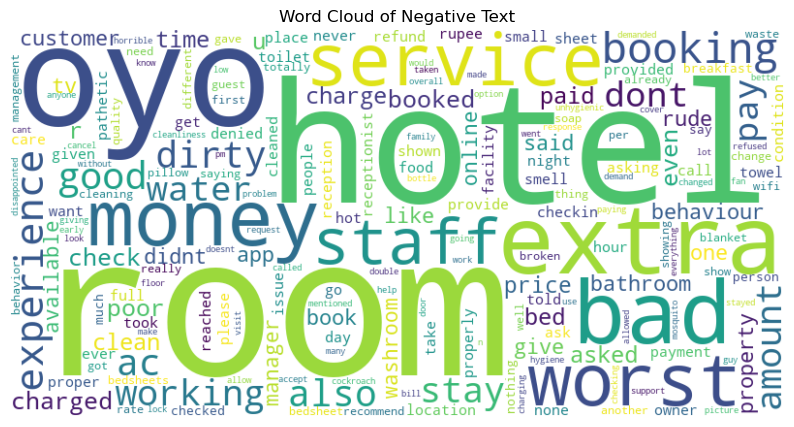

In [127]:
word_freq = negative['review_text'].str.split(expand=True).stack().value_counts()
print(word_freq.head(10))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Text')
plt.show()

In [128]:
df

,hotel_id,user_name,review_text,date,title,Location,sentiment
0,110286,919254556611,none,28 May 2023,5,Agra,Positive
1,110286,Rajg,none,30 Apr 2023,5,Agra,Positive
2,110286,Sagar Kumar,wonderful stay,24 Apr 2023,5,Agra,Positive
3,110286,Sumit Sharma,excellent,20 Apr 2023,5,Agra,Positive
4,110286,rajesh kumardomadia,good facility available good support,13 Apr 2023,5,Agra,Positive
...,...,...,...,...,...,...,...
204528,89724,SANJAY CHAUHAN,room service gud one carry luggage upto expect...,20 Dec 2022,1,Zirakpur,Negative
204529,89724,LokeshKashyap,reached ji bell boy lift luggage receptionist ...,18 Dec 2022,1,Zirakpur,Negative
204530,89724,Dhruv Goel,looking stay star property don’t stay hereit’s...,18 Nov 2022,1,Zirakpur,Negative
204531,89724,Shivam Bajaj,checkin experience soo bad room good spacious ...,19 Jul 2022,1,Zirakpur,Negative


In [129]:
df = df[['review_text','sentiment']]
df.head()

,review_text,sentiment
0,none,Positive
1,none,Positive
2,wonderful stay,Positive
3,excellent,Positive
4,good facility available good support,Positive


In [130]:
X = df['review_text']
y = df['sentiment']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
vectorizer = TfidfVectorizer()

In [133]:
X_train = vectorizer.fit_transform(X_train)

X_test= vectorizer.transform(X_test)

In [66]:
logreg = LogisticRegression()
nb = MultinomialNB()
svm = SVC()
rf = RandomForestClassifier()

In [67]:
# Train the models
logreg.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [68]:
# Make predictions on the test set
logreg_preds = logreg.predict(X_test)
nb_preds = nb.predict(X_test)
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)

# Calculate and print the accuracies
logreg_accuracy = accuracy_score(y_test, logreg_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Support Vector Machines Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.9433736858872253
Naive Bayes Accuracy: 0.9338695975363704
Support Vector Machines Accuracy: 0.9459222682382924
Random Forest Accuracy: 0.9390198577041521


In [136]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [142]:
new_data = [
    "The product seems to lack some important features.",
    "The service could use some improvement.",
    "I expected better quality for the price I paid.",
    "The website could be more user-friendly.",
    "The wait time was longer than I anticipated.",
    "There were a few minor issues with the product.",
    "The performance was not up to my expectations.",
    "I think there is room for enhancement in the customer support.",
    "The packaging could be more environmentally friendly.",
    "The design could use a little more creativity."
]
new_data_tfidf = vectorizer.transform(new_data)


In [141]:
new_preds = logreg.predict(new_data_tfidf)

print(new_preds)

['Positive']


In [113]:
df

,review_text,sentiment
0,none,Positive
1,none,Positive
2,wonderful stay,Positive
3,excellent,Positive
4,good facility available good support,Positive
...,...,...
204528,room service gud one carry luggage upto expect...,Negative
204529,reached ji bell boy lift luggage receptionist ...,Negative
204530,looking stay star property don’t stay hereit’s...,Negative
204531,checkin experience soo bad room good spacious ...,Negative


In [79]:
len(new_preds)

188338

In [80]:
len(df)

188338

In [82]:
df.head()

,review_text,sentiment,sentimate
0,none,Positive,Positive
1,none,Positive,Positive
2,wonderful stay,Positive,Positive
3,excellent,Positive,Positive
4,good facility available good support,Positive,Positive


In [85]:
data = pd.read_csv('./finalmerge.csv')

In [86]:
len(data)

204533

In [137]:
final_data.to_csv('output.csv', index=False)